In [1]:
# *Dataset에 대해 추가 조사 필요
#  타겟 데이터
#     1978 보스턴 주택 가격
#     506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
#  특징 데이터
#     CRIM: 범죄율
#     INDUS: 비소매상업지역 면적 비율
#     NOX: 일산화질소 농도
#     RM: 주택당 방 수
#     LSTAT: 인구 중 하위 계층 비율
#     B: 인구 중 흑인 비율
#     PTRATIO: 학생/교사 비율
#     ZN: 25,000 평방피트를 초과 거주지역 비율
#     CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
#     AGE: 1940년 이전에 건축된 주택의 비율
#     RAD: 방사형 고속도로까지의 거리
#     DIS: 직업센터의 거리
#     TAX: 재산세율

#- 실제 데이터에 대한 상세 기술
# Out [7]

#- 예측하고자 하는 방법/방향 기술
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측

#- 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술
# K-겹 교차 검증
# 데이터를 K개의 분할(즉, 폴드)로 나누고(일반적으로 K = 4 또는 5), 
# K개의 모델을 각각 만들어 K - 1개의 분할에서 훈련하고 나머지 분할에서 평가
# 모델의 검증 점수는 K 개의 검증 점수의 평균

# - 사용된 모델의 입력층과 출력층에 대한 기술
# 입력층 : 64차원의 relu 활성화 함수를 사용
# 출력층 : 1차원 선형 Layer 사용, 활성화 함수 사용 안함, 스칼라 회귀


In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [8]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [9]:
train_data.shape

(404, 13)

In [10]:

test_data.shape

(102, 13)

In [11]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [12]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [13]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [14]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

W0728 19:57:58.010133 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 19:57:58.045269 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 19:57:58.052101 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 19:57:58.094069 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.

처리중인 폴드 # 0


W0728 19:57:58.218138 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0728 19:57:58.223939 11140 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:1008: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [15]:
all_scores

[2.146889055129325, 2.3480641416984027, 2.8520495136185446, 2.5003778733829463]

In [16]:
np.mean(all_scores)

2.4618451459573047

In [17]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [23]:
import matplotlib.pyplot as plt

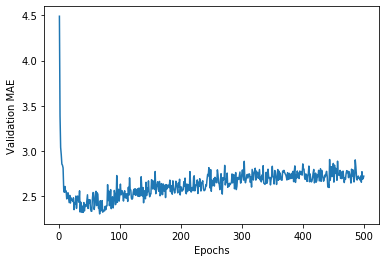

In [24]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

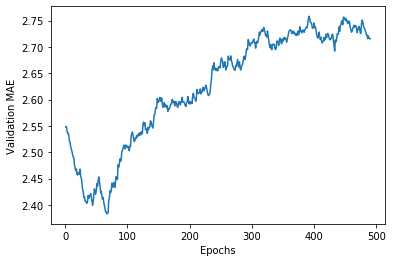

In [25]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 507us/step


In [27]:
test_mae_score

3.2337565048068178

In [28]:
test_mse_score

21.5385477402631